# File Upload & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload File
df = pd.read_csv("USvideos_modified.csv", sep=",")

#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows

print(df.shape)
df.head()

(4525, 23)


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


## Feature Selection by Box Plot Visualization

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def lin_reg_bp(df,var_1,var_2):
    
    X = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(X, y)
    
    # Predict
    y_predicted = regression_model.predict(X)
    
    # Create dataframe for data
    df_var = pd.DataFrame({var_1:X.flatten(), var_2: y_predicted})
    
    # Plot
    boxplot = df_var.boxplot(column=[var_1,var_2])
    return boxplot

## Linear Regression & Evaluation Metrics 

In [4]:
def linear_regression(df,var_1,var_2):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()

### # of days Trending vs Days It Takes to Trend After Published

<AxesSubplot:>

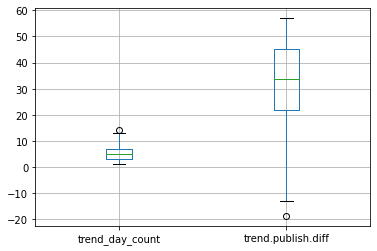

In [5]:
lin_reg_bp(df,'trend_day_count','trend.publish.diff')

Slope: [1.53339882]
Intercept: 25.878192534381135
Root mean squared error:  31.61371778573906
R2 score:  0.20760065567401664


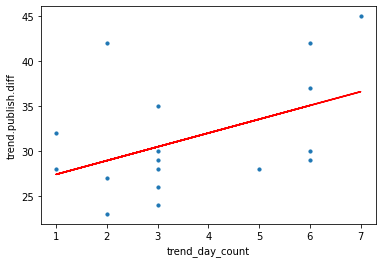

In [6]:
df_mdaystrend = df.loc[(df['trend.publish.diff'] >= 22) & (df['trend.publish.diff'] <= 45)]
linear_regression(df_mdaystrend,'trend_day_count','trend.publish.diff')

### # of Days Trending vs Views

<AxesSubplot:>

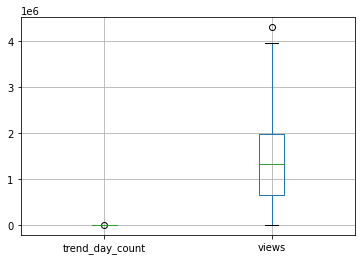

In [7]:
lin_reg_bp(df,'trend_day_count','views',)

Slope: [815.99407749]
Intercept: 1277709.2906704904
Root mean squared error:  3043509845.510315
R2 score:  0.0015380525424323332


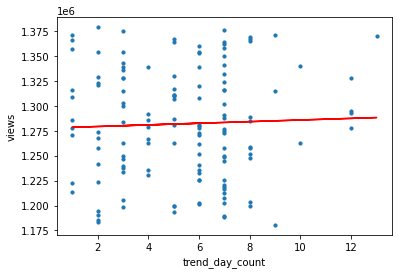

In [9]:
df_mviews = df.loc[(df['views'] >= 1180000) & (df['views'] <= 1380000)]
linear_regression(df_mviews,'trend_day_count','views')

### Days it Takes to Trend After Published vs Views

<AxesSubplot:>

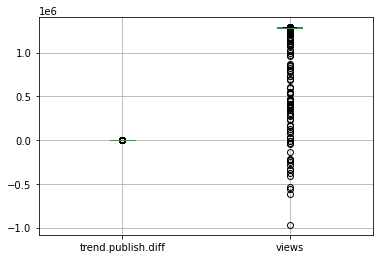

In [10]:
lin_reg_bp(df,'trend.publish.diff','views',)

Slope: [-328.25439888]
Intercept: 1284154.9302327596
Root mean squared error:  3047515362.891633
R2 score:  0.0002239918401067964


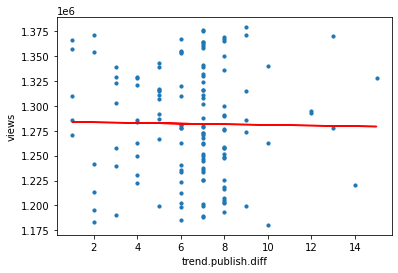

In [11]:
linear_regression(df_mviews,'trend.publish.diff','views')

### Publish Hour vs Views

<AxesSubplot:>

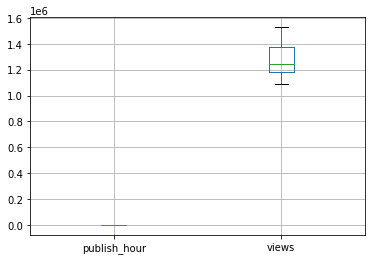

In [12]:
lin_reg_bp(df,'publish_hour','views',)

Slope: [-6.94552059e-07]
Intercept: 14.786737791088747
Root mean squared error:  39.79518249065356
R2 score:  3.694930309494637e-05


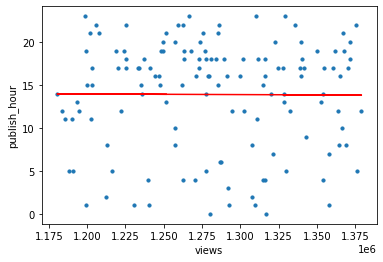

In [13]:
df_mviews = df.loc[(df['views'] >= 1180000) & (df['views'] <= 1380000)]
linear_regression(df_mviews,'views','publish_hour')

### Subscriber Count vs Trend Day Count

<AxesSubplot:>

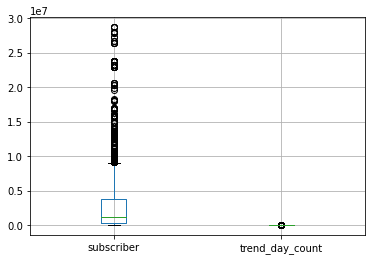

In [14]:
lin_reg_bp(df,'subscriber','trend_day_count')

Slope: [-6.31735261e-07]
Intercept: 6.394766917191017
Root mean squared error:  6.979747235229153
R2 score:  0.042356986519905826


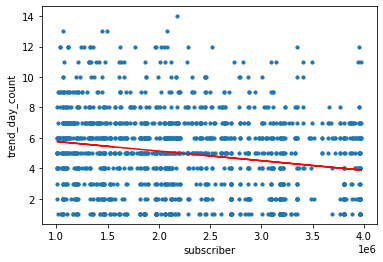

In [18]:
df_majorityviews = df.loc[(df['subscriber'] >= 1000000) & (df['subscriber'] <= 4000000)]
linear_regression(df_majorityviews,'subscriber','trend_day_count')